In [14]:
import pandas as pd

# Load the dataset
data1 = pd.read_csv('../../data/energy_dataset.csv')
data2 = pd.read_csv('../../data/weather_features.csv')

# Display the first few rows to confirm it's loaded correctly
# data1.head()
data2.head()


,dt_iso,city_name,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,2015-01-01 00:00:00+01:00,Valencia,270.475,270.475,270.475,1001,77,1,62,0.0,0.0,0.0,0,800,clear,sky is clear,01n
1,2015-01-01 01:00:00+01:00,Valencia,270.475,270.475,270.475,1001,77,1,62,0.0,0.0,0.0,0,800,clear,sky is clear,01n
2,2015-01-01 02:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n
3,2015-01-01 03:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n
4,2015-01-01 04:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n


In [15]:
print(data1.describe())
# data2.describe()

       generation biomass  generation fossil brown coal/lignite  \
count        35045.000000                          35046.000000   
mean           383.513540                            448.059208   
std             85.353943                            354.568590   
min              0.000000                              0.000000   
25%            333.000000                              0.000000   
50%            367.000000                            509.000000   
75%            433.000000                            757.000000   
max            592.000000                            999.000000   

       generation fossil coal-derived gas  generation fossil gas  \
count                             35046.0           35046.000000   
mean                                  0.0            5622.737488   
std                                   0.0            2201.830478   
min                                   0.0               0.000000   
25%                                   0.0            412

In [16]:
# data1.info()
data2.info()
# print(data1.dtypes)
# print(data2.dtypes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178396 entries, 0 to 178395
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   dt_iso               178396 non-null  object 
 1   city_name            178396 non-null  object 
 2   temp                 178396 non-null  float64
 3   temp_min             178396 non-null  float64
 4   temp_max             178396 non-null  float64
 5   pressure             178396 non-null  int64  
 6   humidity             178396 non-null  int64  
 7   wind_speed           178396 non-null  int64  
 8   wind_deg             178396 non-null  int64  
 9   rain_1h              178396 non-null  float64
 10  rain_3h              178396 non-null  float64
 11  snow_3h              178396 non-null  float64
 12  clouds_all           178396 non-null  int64  
 13  weather_id           178396 non-null  int64  
 14  weather_main         178396 non-null  object 
 15  weather_descripti

In [17]:
print(data1.isnull().sum())
print("")
print(data2.isnull().sum())

time                                               0
generation biomass                                19
generation fossil brown coal/lignite              18
generation fossil coal-derived gas                18
generation fossil gas                             18
generation fossil hard coal                       18
generation fossil oil                             19
generation fossil oil shale                       18
generation fossil peat                            18
generation geothermal                             18
generation hydro pumped storage aggregated     35064
generation hydro pumped storage consumption       19
generation hydro run-of-river and poundage        19
generation hydro water reservoir                  18
generation marine                                 19
generation nuclear                                17
generation other                                  18
generation other renewable                        18
generation solar                              

In [18]:
# Select only the object type columns and use .nunique() on them
unique_counts_object = data2.select_dtypes(include=['object']).nunique()
print("Number of Unique Values for Object Type Columns:\n")
print(unique_counts_object)
# data1.nunique()
# # Find the unique categorical values for object types
# # Select only the object type columns
# object_columns = data2.select_dtypes(include=['object'])

# # Loop through each column to print the unique values
# for col in object_columns.columns:
#     unique_values = object_columns[col].unique()
#     print(f"Unique values for column '{col}': {unique_values}")



Number of Unique Values for Object Type Columns:

dt_iso                 35064
city_name                  5
weather_main              12
weather_description       43
weather_icon              24
dtype: int64


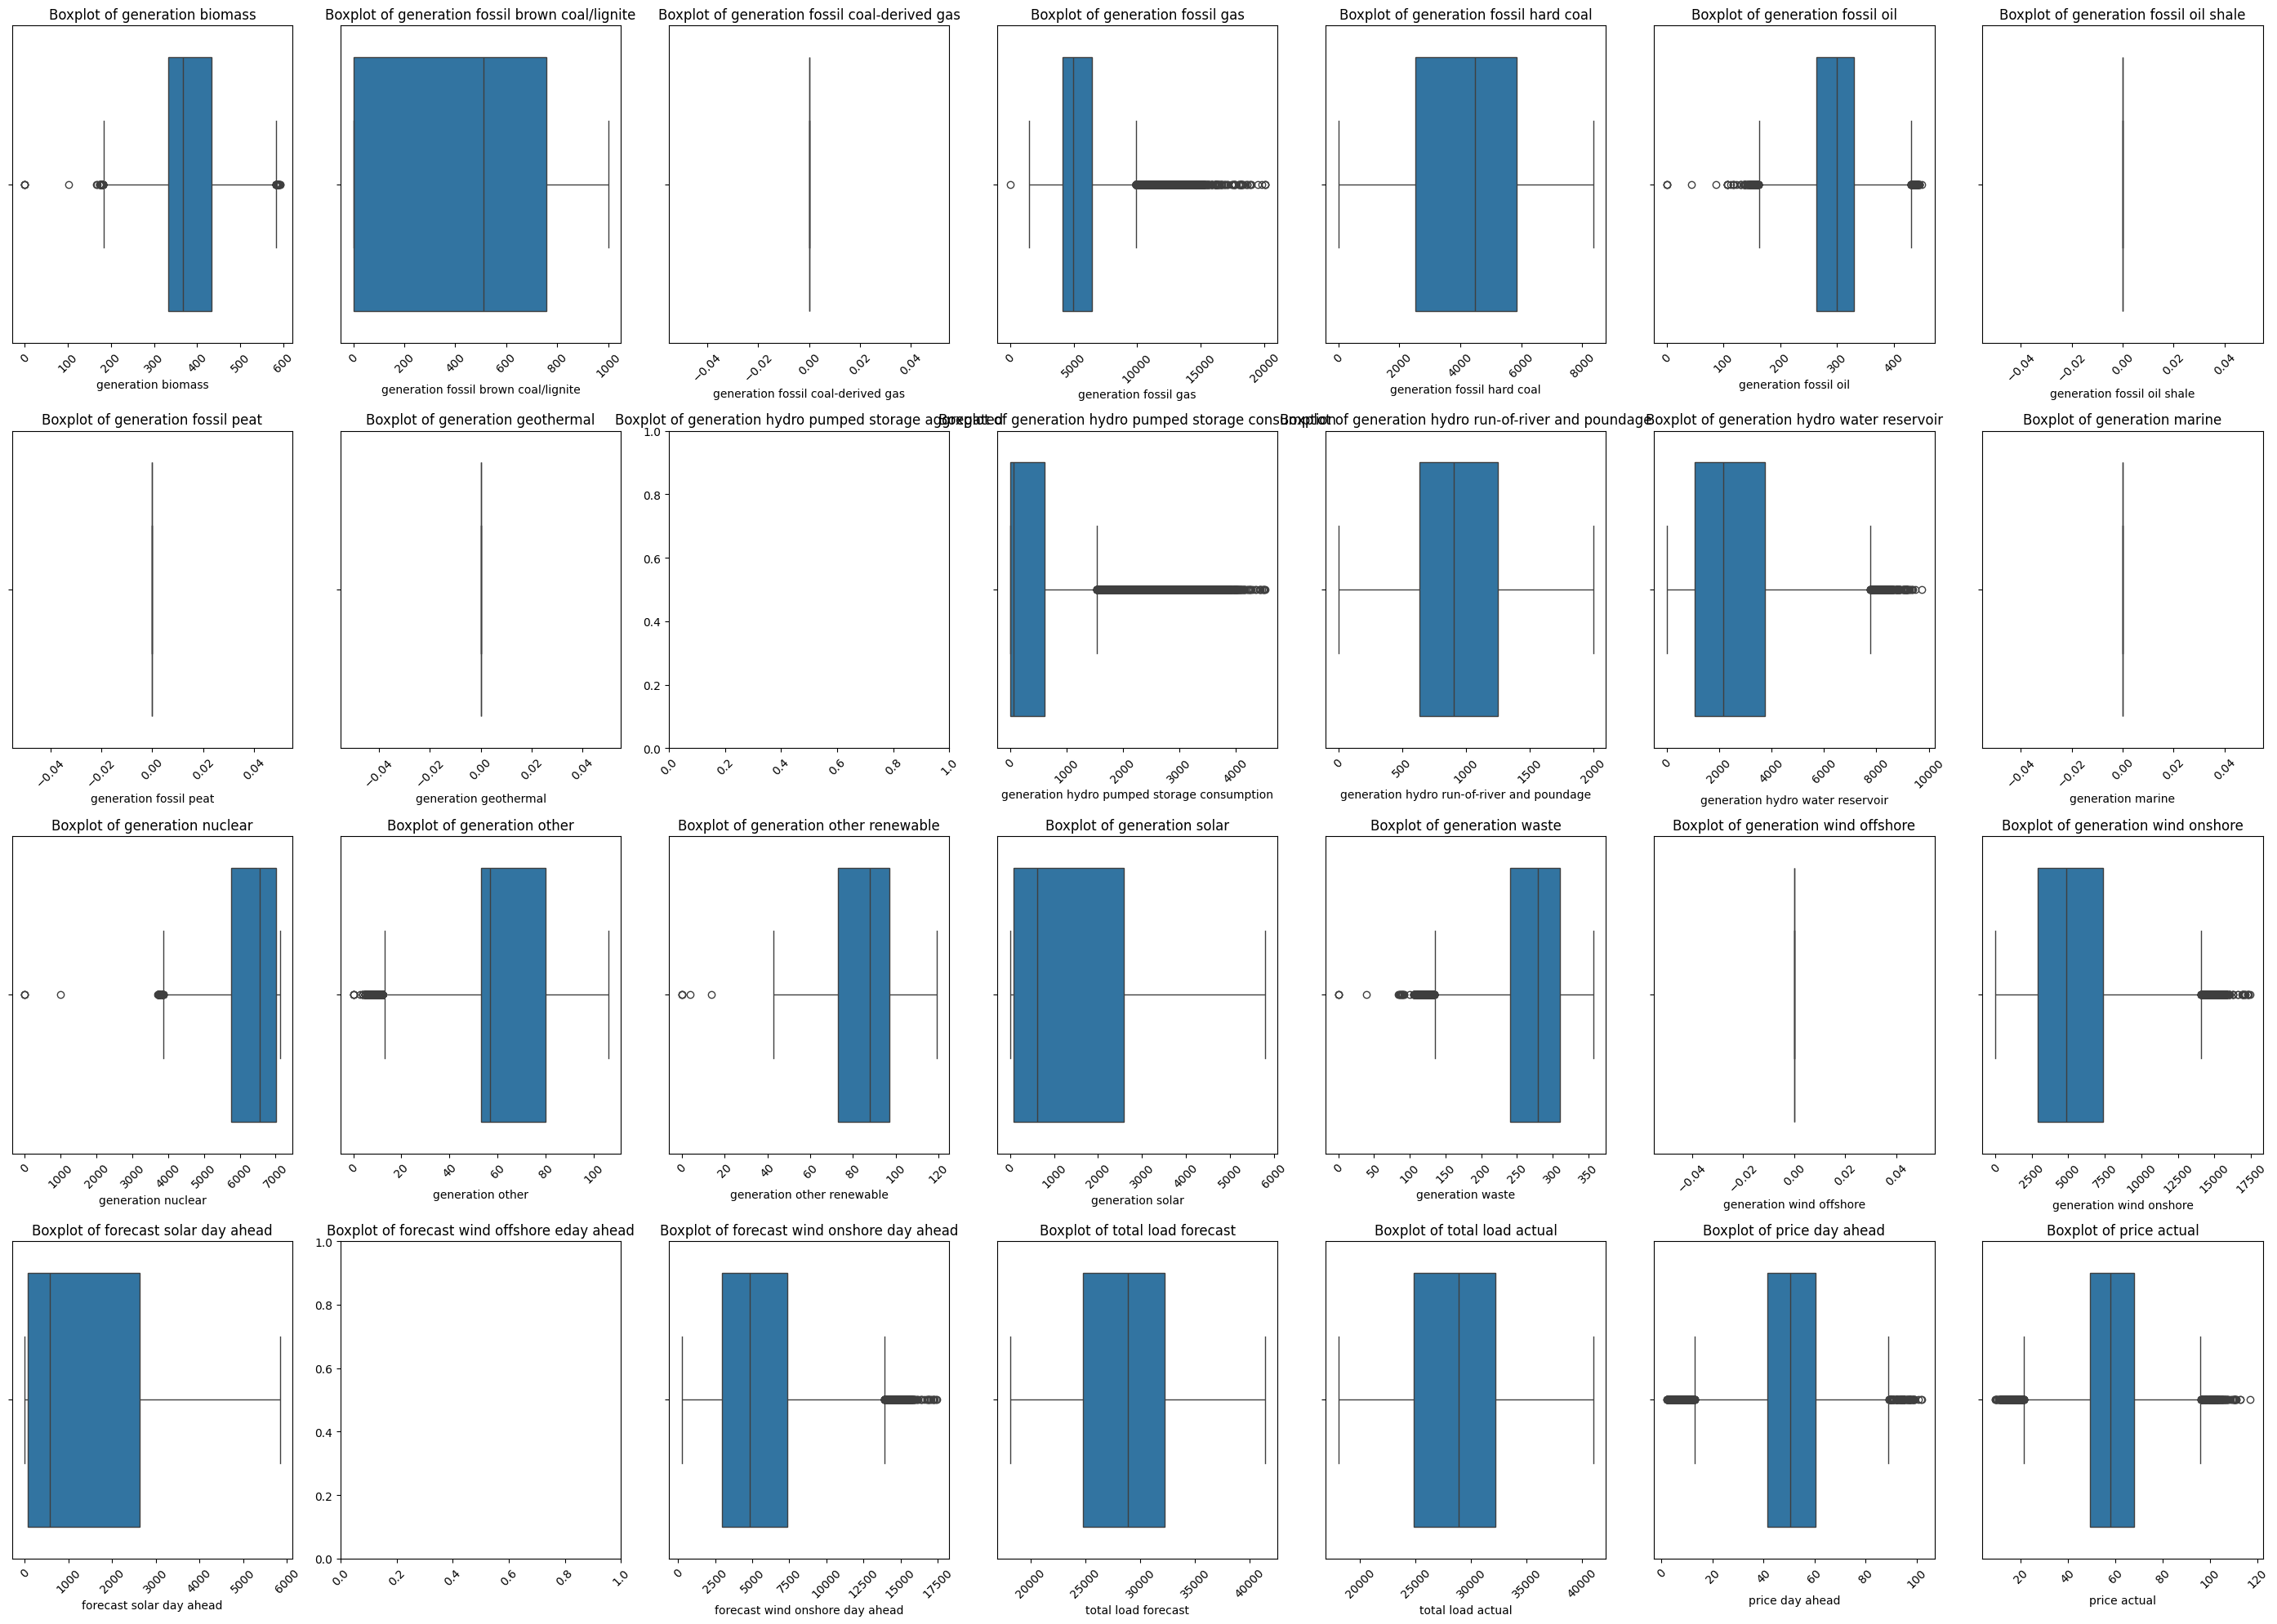

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('../../data/energy_dataset.csv')

# Select only numerical columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Create subplots with appropriate number of rows and columns
num_cols = len(numeric_cols)
num_rows = (num_cols + 6) // 7  # Define number of rows, to have up to 7 boxplots per row

# Adjust the figure size to increase width and height proportionally
fig, axes = plt.subplots(num_rows, 7, figsize=(28, num_rows * 5))
axes = axes.flatten()  # Flatten axes for easy iteration

# Plot each column
for i, column in enumerate(numeric_cols):
    sns.boxplot(x=df[column].dropna(), ax=axes[i])
    axes[i].set_title(f'Boxplot of {column}')
    axes[i].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability if needed

# Hide any unused subplots
for i in range(len(numeric_cols), len(axes)):
    fig.delaxes(axes[i])

# Improve layout for visibility
plt.tight_layout()
plt.show()


In [20]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load the dataset
# df = pd.read_csv('../data/energy_dataset.csv')

# Drop non-numeric columns (e.g., timestamp or categorical columns)
df_numeric = df.select_dtypes(include=['float64', 'int64'])

# Standardize the numeric data for PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_numeric)

# Set n-components to None to keep all components. Change None to a number to keep that many components.
pca = PCA(n_components=None)

# Fit PCA on the scaled data
X_pca = pca.fit_transform(X_scaled)

# Examine the explained variance ratio to decide how many components to keep
explained_variance = pca.explained_variance_ratio_
print(f"Explained Variance Ratio: {explained_variance}")

# Choose the number of components to retain based on cumulative explained variance
cumulative_variance = np.cumsum(explained_variance)
print(f"Cumulative Explained Variance: {cumulative_variance}")

# Keep components that explain 95% of the variance
n_components_95 = np.argmax(cumulative_variance >= 0.95) + 1
print(f"Number of components to explain 95% variance: {n_components_95}")

# If desired, re-run PCA with the reduced number of components
pca_reduced = PCA(n_components=n_components_95)
X_pca_reduced = pca_reduced.fit_transform(X_scaled)


c:\Users\sep_j\.pyenv\pyenv-win\versions\3.10.11\lib\site-packages\sklearn\utils\extmath.py:1137: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
c:\Users\sep_j\.pyenv\pyenv-win\versions\3.10.11\lib\site-packages\sklearn\utils\extmath.py:1142: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
c:\Users\sep_j\.pyenv\pyenv-win\versions\3.10.11\lib\site-packages\sklearn\utils\extmath.py:1162: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


ValueError: Input X contains NaN.
PCA does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values